**Azdine Bahloul**

__02/03/2023__

# Analyzing LinkedIn's Data Analyst Job Market in the US

We used a database retrieved via Kaggle of Data Analyst jobs in the United States. Our objective was to investigate this data through the creation of infographics in order to comprehend the trends in the Data Analyst employment market.

Features

title: Job title

company: Name of the company

description: description of the job and company

onsite_remote:
Location where the employee will be working from

salary: Salary for the job. May be yearly or hourly. In most cases, it is a range from min to max

location: Where the company with the opening role is located

criteria: Job requirements like experience, employment type, etc

posted_date: The date the job was posted

link: The URL to the job

## Data processing and exploration

In [1]:
# Importing Dataset
import pandas as pd 

In [2]:
import openpyxl

In [3]:
wb = openpyxl.load_workbook('data.xlsx')

In [4]:
feuille = wb['linkedin-jobs-usa']

In [5]:
# Create a list containing the column names from the first line
noms_colonnes = [cellule.value for cellule in feuille[1]]

In [6]:
# Load data into a pandas DataFrame using column names
data = pd.DataFrame(feuille.values, columns=noms_colonnes)

In [7]:
# Removal of the "link" column
data = data.drop('link', axis=1)

In [8]:
#Removal of the useless first raw
data = data.drop(0)

In [9]:
data =  data.rename(columns  = {'onsite_remote':'mode'})

In [10]:
# Top 5 rows 
data.head()

,title,company,description,mode,salary,location,criteria,posted_date
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22 00:00:00
2,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22 00:00:00
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17 00:00:00
4,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17 00:00:00
5,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17 00:00:00


In [11]:
# Shape of dataset
data.shape

(2845, 8)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 1 to 2845
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2845 non-null   object
 1   company      2845 non-null   object
 2   description  2845 non-null   object
 3   mode         2845 non-null   object
 4   salary       2845 non-null   object
 5   location     2845 non-null   object
 6   criteria     2845 non-null   object
 7   posted_date  2845 non-null   object
dtypes: object(8)
memory usage: 177.9+ KB


In [13]:
#Number of missing values
data.isin(['NaN']).sum()

title             0
company           0
description       0
mode              0
salary         1916
location          0
criteria          0
posted_date       0
dtype: int64

## Data Visualisation 

In [14]:
import matplotlib.pyplot as plt

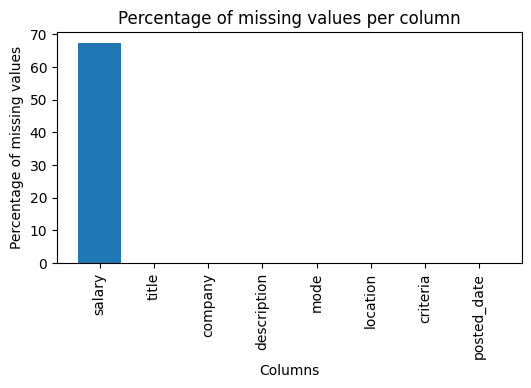

In [15]:
# Create a figure
fig, ax = plt.subplots(figsize=(6, 3))

# Count the number of missing values per column
missing_values_count = data.isin(['NaN']).sum()

# Calculate the percentage of missing values per column
missing_values_percent = missing_values_count / len(data) * 100

# Sort the columns in descending order of percentage of missing values
missing_values_percent = missing_values_percent.sort_values(ascending=False)

# Create a bar chart to display the percentage of missing values
ax.bar(missing_values_percent.index, missing_values_percent.values)

# Add axis and title labels
ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of missing values')
ax.set_title('Percentage of missing values per column')

# Rotate the x-axis labels to avoid overlapping
plt.xticks(rotation=90)

# Display the chart
plt.show()


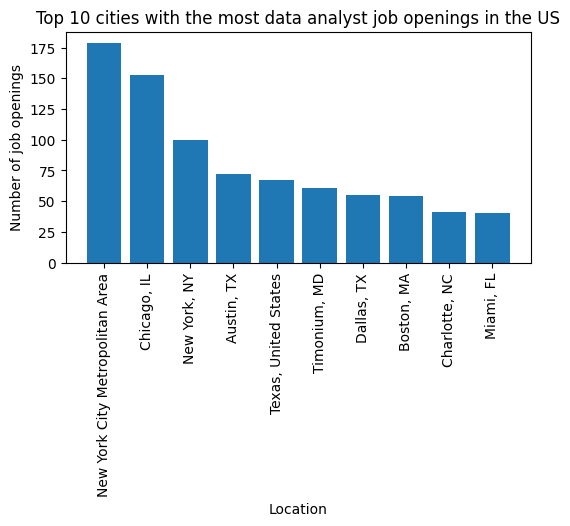

In [16]:
# Visualization of the locations that offer the most data analyst job openings
top_locations = data[data['location'] != 'United States']['location'].value_counts().nlargest(10)
plt.figure(figsize=(6,3))
plt.bar(top_locations.index, top_locations.values)
plt.title('Top 10 cities with the most data analyst job openings in the US')
plt.xlabel('Location')
plt.ylabel('Number of job openings')
plt.xticks(rotation=90)
plt.show()

Total number of different job titles:  4
Data Analyst                      2110
Data Analyst - Recent Graduate     183
Junior Data Analyst                139
Data Analyst - (Remote - US)        62
Name: title, dtype: int64


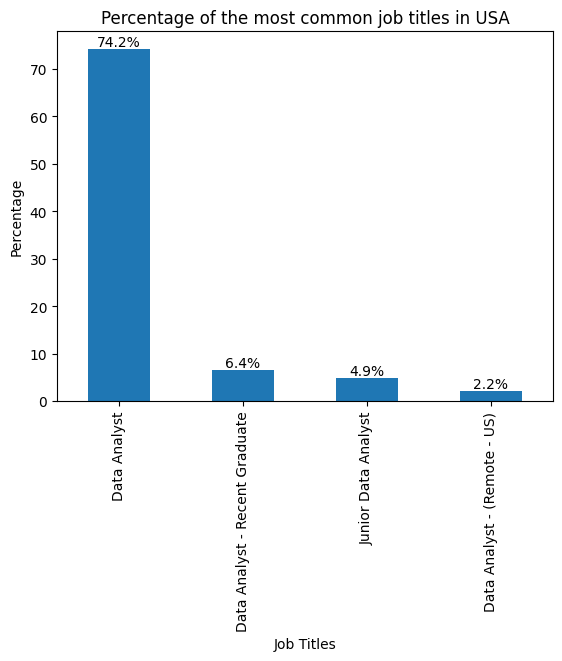

<Figure size 600x300 with 0 Axes>

In [17]:
# Count the number of different job titles and display them
titles_count = data['title'].value_counts()
titles_count = titles_count[titles_count > 40] # Filter out job titles with only one occurrence
print("Total number of different job titles: ", len(titles_count))
print(titles_count)

# Calculate the percentage of each job title and display the chart
titles_percent = titles_count/data.shape[0]*100
ax = titles_percent.plot(kind='bar')
plt.title("Percentage of the most common job titles in USA")
plt.xlabel("Job Titles")
plt.ylabel("Percentage")
plt.figure(figsize=(6, 3))
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()


                          Company  Count  Percentage
0                          PayPal    499   17.539543
1                  Insight Global     97    3.409490
2                Agility Partners     69    2.425308
3                       Mediavine     62    2.179262
4         The Walt Disney Company     60    2.108963
5            Azenta Life Sciences     38    1.335677
6         Launch Consulting Group     38    1.335677
7                 London Approach     38    1.335677
8  Chicago Teachers' Pension Fund     37    1.300527
9             Synergy Interactive     37    1.300527


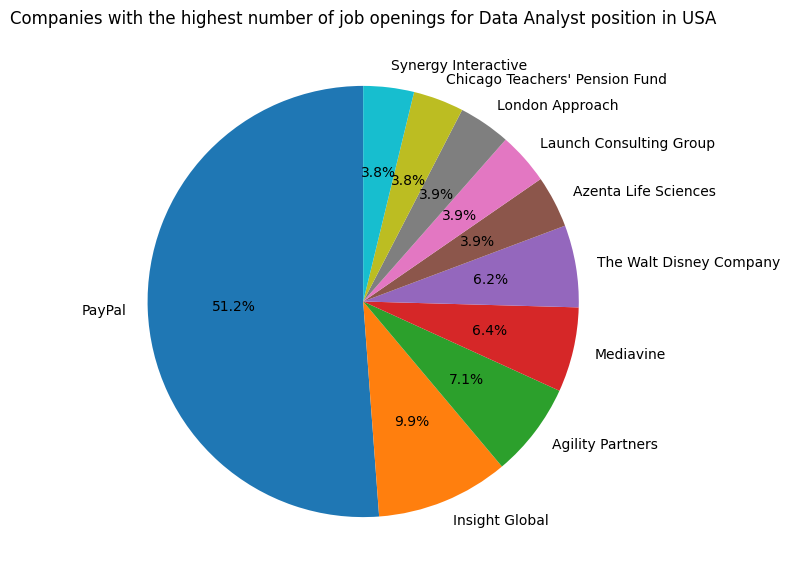

In [18]:
# Pie chart with the proportion of companies offering data analyst jobs

# Count the occurrences of each company and sort in descending order
company_counts = data['company'].value_counts().sort_values(ascending=False)

# Calculate the percentage of each company
company_percentages = company_counts / company_counts.sum() * 100

# Create a DataFrame for the company data and their percentages
company_df = pd.DataFrame({'Company': company_counts.index, 'Count': company_counts.values, 'Percentage': company_percentages.values})

# Display the top 10 most frequent companies
top_companies = company_df.head(10)
print(top_companies)

# Create a figure for the pie chart
fig, ax = plt.subplots(figsize=(7, 7))

# Create the pie chart
ax.pie(top_companies['Percentage'], labels=top_companies['Company'], autopct='%1.1f%%', startangle=90)

# Add a title
ax.set_title('Companies with the highest number of job openings for Data Analyst position in USA')

# Display the pie chart
plt.show()


<Figure size 400x200 with 0 Axes>

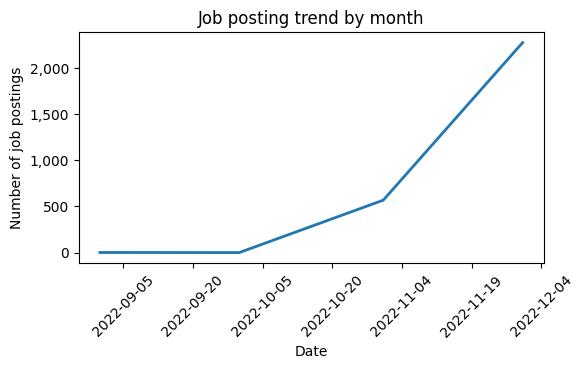

In [19]:
#### Job posting trend

# Create a column with date in datetime format
data['posted_date'] = pd.to_datetime(data['posted_date'])

# Group the data by month and count the number of job postings
post_count = data.groupby(pd.Grouper(key='posted_date', freq='M'))['title'].count()

#Small figure
plt.figure(figsize=(4, 2))

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 3))

# Plot the graph
ax.plot(post_count.index, post_count.values, linewidth=2)

# Format the x-axis
ax.set_xlabel('Date')
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.tick_params(axis='x', rotation=45)

# Format the y-axis
ax.set_ylabel('Number of job postings')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Title
ax.set_title('Job posting trend by month')

# Show the graph
plt.show()


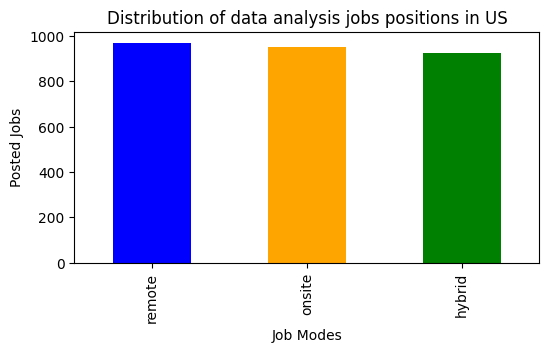

In [31]:
# Distribution of jobs based on Onsite/Remote/Hybrid
mode_counts = data['mode'].value_counts()

#Small figure
plt.figure(figsize=(6, 3))

# Create a bar graph
mode_counts.plot(kind='bar', color=['blue', 'orange','green'])

# Add labels to axes and graph
plt.xlabel('Job Modes')
plt.ylabel('Posted Jobs')
plt.title('Distribution of data analysis jobs positions in US')

# Show the graph
plt.show()


In [21]:
import numpy as np

In [22]:
import re

In [26]:
# Extract salaries for the "Data Analyst" category
salaries_da = []
for salary in data['salary']:
    if isinstance(salary, str) and '$' in salary:
        salary_cleaned = salary.replace(',', '').replace('$', '').split()[0].strip('_x000D')
        salary_cleaned = re.sub('[^0-9]','', salary_cleaned) # garder seulement les chiffres
        if salary_cleaned:
            salaries_da.append(int(salary_cleaned))
        else:
            salaries_da.append(np.nan)
    else:
        salaries_da.append(np.nan)

# Add salaries to the dataframe
data.loc[:, 'salaries'] = salaries_da


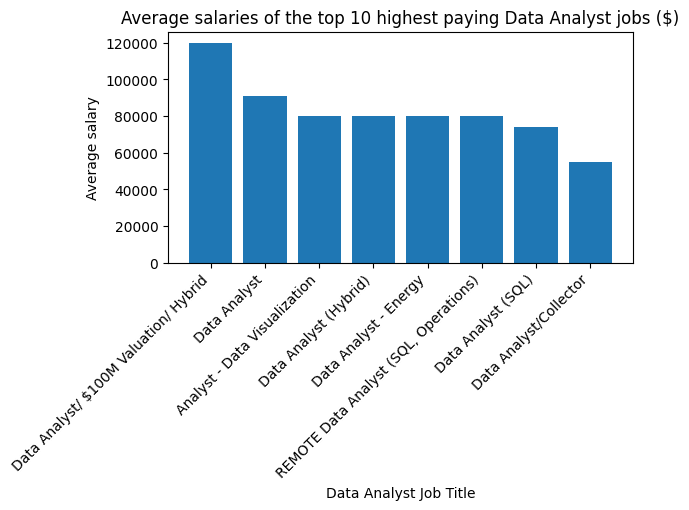

In [34]:
# Clean the salaries column
salaries_da = []
for salary in data['salary']:
    if isinstance(salary, str) and '$' in salary:
        salary_cleaned = salary.replace(',', '').replace('$', '').split()[0].strip('_x000D')
        salary_cleaned = ''.join(filter(str.isdigit, salary_cleaned))
        if salary_cleaned != '':
            salary_value = int(salary_cleaned)
            if salary_value > 20000: # Modification here
                salaries_da.append(salary_value)
            else:
                salaries_da.append(np.nan)
        else:
            salaries_da.append(np.nan)
    else:
        salaries_da.append(np.nan)

# Add salaries to the DataFrame
data['salaries'] = salaries_da

# Remove rows with missing salaries
data_da = data.dropna(subset=['salaries'])

# Visualize salaries by job titles
title_salaries = data.groupby('title')['salaries'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(6,3))
plt.bar(title_salaries.index, title_salaries.values)
plt.title('Average salaries of the top 10 highest paying Data Analyst jobs ($)')
plt.xlabel('Data Analyst Job Title')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average salary')
plt.show()


## Source

The Kaggle website [here](https://www.kaggle.com/datasets/cedricaubin/linkedin-data-analyst-jobs-listings/code?resource=download) was utilized to retrieve the data for this investigation.